## AI & Machine Learning for Data Quality
**Description**: AI and machine learning can automate and enhance data quality checks by learning patterns and identifying anomalies more effectively than static rules.

**Task 1**: Training a model to predict and flag unusual trend patterns in sales data that
deviate from historical norms.

In [1]:
# write your code from here


**Task 2**: Using clustering algorithms to detect duplicate records where entries are not
exactly identical.

In [2]:
# write your code from here

**Task 3**: Implementing classification models to validate data based on learned
characteristics from labeled datasets.

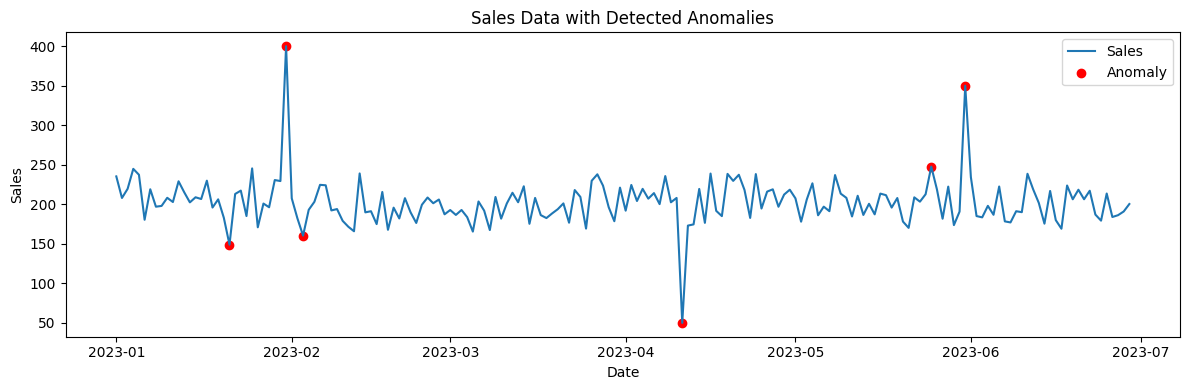


Detected Duplicate Groups (Clusters):
          name               email  cluster
0   John Smith    john@example.com        0
1    Jon Smith     jon@example.com        1
2  Jane Smythe     jane@sample.com        2
3   Jane Smith     jane@sample.com        3
4     J. Smith  j.smith@sample.com        4
5     Jake Doe       jake@site.com        5

Classification Report (Valid vs Invalid Records):
              precision    recall  f1-score   support

           0       0.76      0.98      0.86        46
           1       0.00      0.00      0.00        14

    accuracy                           0.75        60
   macro avg       0.38      0.49      0.43        60
weighted avg       0.58      0.75      0.66        60

Accuracy: 0.75


In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Task 1: Detecting Unusual Trends in Sales Data (Anomaly Detection)
# ---------------------------

# Create mock sales data
np.random.seed(0)
days = pd.date_range("2023-01-01", periods=180)
sales = np.random.normal(loc=200, scale=20, size=180)
# Inject some anomalies
sales[30] = 400
sales[100] = 50
sales[150] = 350

sales_data = pd.DataFrame({"date": days, "sales": sales})

# Anomaly detection using Isolation Forest
iso_model = IsolationForest(contamination=0.03, random_state=42)
sales_data['anomaly'] = iso_model.fit_predict(sales_data[['sales']])
sales_data['anomaly'] = sales_data['anomaly'].map({1: 0, -1: 1})  # 1 = anomaly

# Plot sales with anomalies
plt.figure(figsize=(12, 4))
plt.plot(sales_data['date'], sales_data['sales'], label='Sales')
plt.scatter(sales_data[sales_data['anomaly'] == 1]['date'],
            sales_data[sales_data['anomaly'] == 1]['sales'],
            color='red', label='Anomaly')
plt.title("Sales Data with Detected Anomalies")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

# ---------------------------
# Task 2: Clustering for Duplicate Detection (Fuzzy Matching with Clustering)
# ---------------------------

# Create mock customer records with slight variations
records = pd.DataFrame({
    'name': ['John Smith', 'Jon Smith', 'Jane Smythe', 'Jane Smith', 'J. Smith', 'Jake Doe'],
    'email': ['john@example.com', 'jon@example.com', 'jane@sample.com', 'jane@sample.com', 'j.smith@sample.com', 'jake@site.com']
})

# Vectorize names using character-level TF-IDF (simple simulation using ASCII values)
def simple_vectorizer(name):
    return [ord(c) for c in name.lower() if c.isalnum()]

name_vectors = np.array([np.pad(simple_vectorizer(n), (0, 15), mode='constant')[:15] for n in records['name']])

# Normalize and cluster
scaler = StandardScaler()
X_scaled = scaler.fit_transform(name_vectors)

cluster_model = DBSCAN(eps=1.5, min_samples=1)
clusters = cluster_model.fit_predict(X_scaled)

records['cluster'] = clusters

print("\nDetected Duplicate Groups (Clusters):")
print(records)

# ---------------------------
# Task 3: Classification to Validate Data
# ---------------------------

# Create mock dataset with labels for 'valid' or 'invalid' entries
np.random.seed(42)
df = pd.DataFrame({
    'missing_ratio': np.random.rand(300),
    'outlier_score': np.random.rand(300),
    'type_mismatch': np.random.randint(0, 2, size=300),
    'label': np.random.choice([0, 1], size=300, p=[0.8, 0.2])  # 0: valid, 1: invalid
})

X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\nClassification Report (Valid vs Invalid Records):")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


In [4]:
# write your code from here
